In [1]:
from importlib import reload

import os, sys
from pathlib import Path
import json

WORK_DIR = Path.cwd().parent

sys.path.append(str(WORK_DIR))

from src import (
    graph_gen,
    ollama_manager,
    video_tools,
    prompt_formatters,
    datasets,
)


In [2]:
CVRR_DIR = Path("/multiverse/datasets/shared/cvrr_challange25/val")
VIDEO_DIR = WORK_DIR / "data/datasets/action-genome/Charades_v1_480"
video_ids = [{'video_id': "0A8CF"}]
video_path = VIDEO_DIR / "0A8CF.mp4"


In [3]:
print(video_path)


/home/lusha/star_code/data/datasets/action-genome/Charades_v1_480/0A8CF.mp4


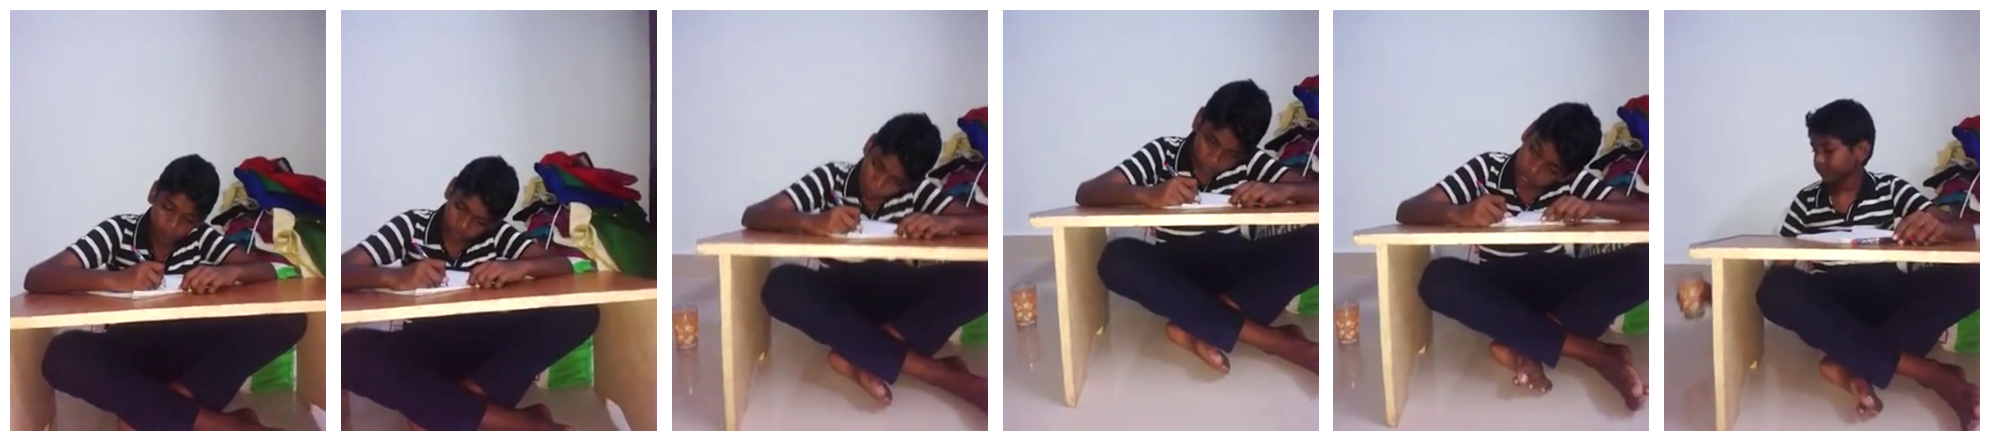

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

frame_dir, frame_paths = video_tools.extract_frames(video_path, fps=0.2, output_dir="frames")
images = frame_paths
fig, axes = plt.subplots(1,  len(images), figsize=(20, 12))

for ax, img_path in zip(axes, images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [4]:
fps = 0.1
video_encodings = list(frames for frames in video_tools.generate_frames(
    VIDEO_DIR, 
    video_info=video_ids,
    fps=fps))
len(video_encodings)


1

In [6]:
video_encodings[0]


{'video_id': '0A8CF',
 'frames': [{'frame_id': 0,
   'encoding': 'iVBORw0KGgoAAAANSUhEUgAAAWgAAAHgCAIAAAAHZGA3AAAACXBIWXMAAAABAAAAAQBPJcTWAAAQAElEQVR4nOzd91dUWbrw8fnprvXee2faVnLOIBlFUQFRwJzanG1Tm3NOJJWcQQmKoOScoShyzqB2DnaYnvuHvM85T9Vm1wlFFUFRT6/vYpW07YQ1fObZ++xzzj/aO38RrKPrV6izk637N6y79/fOvj/be37v7v0T6ulhgm+y4Xd+7+39o6ePqWvgnZq6B38XrG/wD03qH/oT6x3WLvIPUv3+HuobfIf1Dvymvp7+XwXr7vsF6uxnYj70/ETq6P6xs2uijs4fsPaO79s6v23teNvW+T0V852W9jfy1nF52yjU3DIOyZvHoKaWMVnzaJOcSdY0wjbWKBvFGppG62UjdfUDtXX9dDW1fVB1TS9UU9VTXdldXtkOlVW08Sstb1VfSWnbRGUtnIpLm+iKSmRYYXGjYPmF9WLlFdQpKqxhyquiy82txHJyK17mVb56VQHl5Ja9eFmS9YoJPpCycoqh7OziFy+KSFlZhVlZxXTPnxeRMjLyofT0vKdPX0HpbGlPXkKpqTlQcvKLpKSspMRsKDHhBZQQn8WU8CwuLiMu5glTVCoUG5kSHZ4U9Tgx4mF8eFjc49BY6FFITFhQVMj9iOB74UF3HwfdevjgZti96yF3rwXfvvLg5qV71y/cuXb+9vVzd7FrZ+/cPHXv+M7TG5dv83Fa7evsv9IlwNvZH/NhP8NX7B+aw4FASHBIcHxYOErK5IJwoB2CgmgCR25BdX4+E98OUAPsIHBA2XlMiAgHDp4dxWJ2PHtWCGpgHDieUHYkJ+WgHYSP+PhMCNSIjU5FOKCYiGS0A+BAOxAOCOEIvv2I2HHnatCty/fRDgIHdOv0/ZO7z25YthXh8PdYR9TgNE

In [18]:
reload(video_tools)


<module 'src.video_tools' from '/home/lusha/star_code/src/video_tools.py'>

In [5]:
video_tools.generate_video_frames(
    str(VIDEO_DIR / f"{video_ids[0]['video_id']}.mp4"),
    fps=fps)


[{'frame_id': 0,
  'encoding': 'iVBORw0KGgoAAAANSUhEUgAAAWgAAAHgCAIAAAAHZGA3AAAACXBIWXMAAAABAAAAAQBPJcTWAAAQAElEQVR4nOzd91dUWbrw8fnprvXee2faVnLOIBlFUQFRwJzanG1Tm3NOJJWcQQmKoOScoShyzqB2DnaYnvuHvM85T9Vm1wlFFUFRT6/vYpW07YQ1fObZ++xzzj/aO38RrKPrV6izk637N6y79/fOvj/be37v7v0T6ulhgm+y4Xd+7+39o6ePqWvgnZq6B38XrG/wD03qH/oT6x3WLvIPUv3+HuobfIf1Dvymvp7+XwXr7vsF6uxnYj70/ETq6P6xs2uijs4fsPaO79s6v23teNvW+T0V852W9jfy1nF52yjU3DIOyZvHoKaWMVnzaJOcSdY0wjbWKBvFGppG62UjdfUDtXX9dDW1fVB1TS9UU9VTXdldXtkOlVW08Sstb1VfSWnbRGUtnIpLm+iKSmRYYXGjYPmF9WLlFdQpKqxhyquiy82txHJyK17mVb56VQHl5Ja9eFmS9YoJPpCycoqh7OziFy+KSFlZhVlZxXTPnxeRMjLyofT0vKdPX0HpbGlPXkKpqTlQcvKLpKSspMRsKDHhBZQQn8WU8CwuLiMu5glTVCoUG5kSHZ4U9Tgx4mF8eFjc49BY6FFITFhQVMj9iOB74UF3HwfdevjgZti96yF3rwXfvvLg5qV71y/cuXb+9vVzd7FrZ+/cPHXv+M7TG5dv83Fa7evsv9IlwNvZH/NhP8NX7B+aw4FASHBIcHxYOErK5IJwoB2CgmgCR25BdX4+E98OUAPsIHBA2XlMiAgHDp4dxWJ2PHtWCGpgHDieUHYkJ+WgHYSP+PhMCNSIjU5FOKCYiGS0A+BAOxAOCOEIvv2I2HHnatCty/fRDgIHdOv0/ZO7z25YthXh8PdYR9TgNEU4Ort/Rzi6un5XfF/xHQkOCY4PDIfYDDLp

In [23]:
sys_file_path = WORK_DIR / "data/prompts/graph-gen/system_prompt.txt"

sys_prompt = graph_gen._load_prompt_fromfile(sys_file_path)
model = "gemma3:4b-it-qat"
# model_options = _load_model_options()
ollama_params = {
    "model": model,
    "system": sys_prompt,
    "stream": True,
    "options": {
        "num_ctx": 10240,
        "temperature": 0.1,
        "num_predict": 1024,
        "seed": 42,
    },
}

url = os.environ.get("OLLAMA_URL", "http://lusha_ollama:11435")
client = ollama_manager.OllamaRequestManager(url, ollama_params)


In [20]:
# pre-load the model
client.generate_completion("hello")


Hello! I’m ready to analyze an image and generate a scene graph. Please provide me with the image. I’ll do my best to provide a detailed and structured analysis. 😊 

Just let me know how you’d like to share the image – you can describe it in detail, or if possible, provide a link to it.

Response at: 53.4 tk/s


'Hello! I’m ready to analyze an image and generate a scene graph. Please provide me with the image. I’ll do my best to provide a detailed and structured analysis. 😊 \n\nJust let me know how you’d like to share the image – you can describe it in detail, or if possible, provide a link to it.'

In [24]:
prompt1 = """\
What's the image describing??

Think step by step.
"""

img = video_encodings[0]['frames'][0]['encoding']

msg1 = {
    "role": "user",
    "content": prompt1,
    "images": [img]
}
resp = client.ollama_completion_request(
            endpoint='chat',
            payload={
                "model": model,
                "messages": [msg1],
                "options": {
                    "num_ctx": 10_000
                }
            }
        )


Here's a breakdown of what the image describes, step by step:

1. **Subject:** There is a young man sitting at a table.
2. **Clothing:** He’s wearing a black and white striped shirt and dark pants.
3. **Action:** He is writing on a piece of paper with a pen.
4. **Background:** Behind him, there's a pile of colorful cloth bags.
5. **Overall:** The image shows a young man studying or working at a table, likely in a home setting. 

Do you want me to zoom in on a specific detail, or perhaps describe the scene in more detail?

Response at: 52.3 tk/s


In [25]:
images = [frame['encoding'] for frame in video_encodings[0]['frames']]

msg1 = {
    "role": "user",
    "content": prompt1,
    "images": images
}


resp = client.ollama_completion_request(
            endpoint='chat',
            payload={
                "model": model,
                "messages": [msg1],
                "options": {
                    "num_ctx": 10_000
                }
            }
        )


Here’s a breakdown of what the image describes, step by step:

1. **Subject:** The image shows a young man sitting on a table.
2. **Posture:** He’s sitting with his knees bent and his feet flat on the floor.
3. **Clothing:** He is wearing a black and white striped shirt and black pants.
4. **Activity:** He is holding a pen and appears to be writing or drawing on a piece of paper.
5. **Setting:** The background appears to be a room with a simple table and a pile of colorful items (likely bags or fabrics) nearby.

In summary, the image captures a young man working or studying at a table in a room.

Response at: 49.6 tk/s


In [28]:
usr_prompt = graph_gen._load_prompt_fromfile(WORK_DIR / "data/prompts/graph-gen/usr_prompt.txt")
reply = graph_gen._load_prompt_fromfile(WORK_DIR / "data/prompts/graph-gen/format_instructions.txt")
# Run frame generation
graph_gen.streaming_frame_generation(
    client,
    VIDEO_DIR, 
    "outputs/out_file.jsonl", 
    video_info=video_ids,
    usr_prompt=usr_prompt,
    reply=reply, 
    fps=fps
)


File outputs/out_file.jsonl already exists!
Responses will be saved to: outputs/out_file_copy4.jsonl
Errors will be logged to: outputs/errors_20250627_16:43:17.txt
========================= Starting Response Generation =========================

Video: 0A8CF
 - interval: None-None
 - 3 frames.

Generating response for iteration 1 - id: 0A8CF


Okay, let's break down the image and analyze the objects and their relationships.

**Objects Detected:**

1.  **Young Man:** A young man is the central figure.
2.  **Black and White Shirt:** He is wearing a black and white striped shirt.
3.  **Wooden Table:** A wooden table is present.
4.  **Notebook:** A notebook is open and on the table.
5.  **Pen:** A pen is resting on the notebook.
6.  **Pile of Bags:** A large pile of colorful bags (green, yellow, orange, and blue) is stacked on top of the table.
7.  **Floor:** The floor is visible beneath the table and the man.
8.  **Wall:** A wall is visible in the background.

**Relationships Between Objects (Descriptive Text):**

The young man is sitting at the wooden table. He is positioned directly in front of the table, facing it. He is holding a pen in his hand, which is resting on the open notebook. The notebook is lying flat on the table. 

The large pile of bags is stacked directly on top of the table, completely covering the surface. T

In [128]:
reload(prompt_formatters)


<module 'src.prompt_formatters' from '/home/lusha/star_code/src/prompt_formatters.py'>

In [122]:
u_format = "some text"
a = prompt_formatters.PromptFormatter(u_format)
a.format(None)


'some text'

In [129]:
u_format = "some text {images}"
sample = {"images": list(range(10))}

a = prompt_formatters.PromptFormatter(u_format)
b = prompt_formatters.ImgPromptDecorator(a, img_field="images")

print(b.format(sample))


some text 

Image 0:
[img]

Image 1:
[img]

Image 2:
[img]

Image 3:
[img]

Image 4:
[img]

Image 5:
[img]

Image 6:
[img]

Image 7:
[img]

Image 8:
[img]

Image 9:
[img]


In [139]:

cmd = """
python -m star_code.src.graph_gen \
  --model gemma3:4b-it-qat \
  --model-options star_code/ollama_model_options.json \
  --video-dir star_code/data/datasets/action-genome/Charades_v1_480 \
  --videos-metadata star_code/data/datasets/STAR/STAR_annotations/STAR_val.json \
  --output-file outputs/generated_stsg.jsonl \
  --usr-prompt star_code/data/prompts/graph-gen/usr_prompt_v2.txt \
  --auto-reply star_code/data/prompts/graph-gen/format_instructions_v2.txt \
  --fps 0.5 \
  --batch-images
"""

%cd {WORK_DIR.parent}
!bash -c {cmd}


/home/lusha


bash: -c: option requires an argument
=== Loading file with videos metadata: star_code/data/datasets/STAR/STAR_annotations/STAR_val.json
=== Generating graphs for 3373 videos
File outputs/generated_stsg.jsonl already exists!
Responses will be saved to: outputs/generated_stsg_copy4.jsonl
Errors will be logged to: outputs/errors_20250627_21:12:32.txt
========================= Starting Response Generation =========================

Video: 6H78U
 - interval: 11.1-19.6
 - 4 frames.

Generating response for iteration 1 - id: 6H78U
Here's a detailed description of the scene based on the provided images, incorporating the requested guidelines:

**Overall Scene:**

The images depict a man cleaning a large, patterned sofa. The setting appears to be an interior room with a white wall, a window with a white frame, and a white wall mounted air conditioner. The man is wearing a white t-shirt, black shorts with Adidas stripes, and a baseball cap. He is barefoot.

**Detailed Breakdown by Frame (as bes